# --NIVEL 1--
Realiza la conexión en Python con el MySQL Workbench para cargar toda la información que tienes en las tablas.
* 1º Realizo la instalación del conector :

In [ ]:
pip install mysql-connector-python

* 2º Importo el conector para MySQL e indico los datos necesarios para hacer la conexión: 

In [1]:
import mysql.connector

conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="operations"
)

* 3º Importo las librerías que voy a utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# Antes de empezar hago una consulta SQL para poder cargar un DataFrame con la información necesaria para poder desarrollar los ejercicios, visualizo la información y el df para comprobar que todo ha salido como esperaba.

In [3]:
query = '''SELECT * FROM transactions 
            JOIN companies ON business_id = company_id 
            JOIN users ON user_id = users_id'''
df = pd.read_sql(query, conexion)    

C:\Users\javie\AppData\Local\Temp\ipykernel_18100\1077173608.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion)


In [4]:
df.info()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               587 non-null    object 
 1   card_id          587 non-null    object 
 2   business_id      587 non-null    object 
 3   timestamp        587 non-null    object 
 4   amount           587 non-null    float64
 5   declined         587 non-null    int64  
 6   product_ids      587 non-null    object 
 7   user_id          587 non-null    int64  
 8   lat              587 non-null    float64
 9   longitude        587 non-null    float64
 10  company_id       587 non-null    object 
 11  company_name     587 non-null    object 
 12  phone            587 non-null    object 
 13  email            587 non-null    object 
 14  company_country  587 non-null    object 
 15  website          587 non-null    object 
 16  users_id         587 non-null    int64  
 17  name            

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,users_id,name,surname,phone,email,birth_date,user_country,city,postal_code,address
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,2021-07-07 17:43:16,293.57,0,59,275,83.7839,-178.8600,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
1,EA2C3281-C9C1-A387-44F8-729FB4B51C76,CcU-2938,b-2222,2021-05-09 10:25:08,119.36,1,"59, 79, 37, 73",275,20.2004,-116.8400,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
2,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,b-2226,2022-02-04 15:52:56,312.50,0,"71, 41",275,58.9367,-76.8171,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
3,FE96CE47-BD59-381C-4E18-E3CA3D44E8FF,CcU-2945,b-2226,2021-06-15 00:26:29,480.13,1,3,275,-21.8805,-112.5880,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
4,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,CcU-2952,b-2230,2022-01-30 15:16:36,239.87,0,"97, 41, 3",275,43.3584,-17.6580,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.


## Ejercicio 1:  Una variable numérica.
* Analizaré  los importes de las transacciones.  
    * Utilizaré un histograma en el cual vemos por columnas la cantidad de transacciones agrupadas por rangos de importes.  
* Histograma:
    * Se crea el gráfico y se indica que trabajaremos con la columna amount del DataFrame que habíamos creado.  
    * Se le pone en el eje X el label indicando que son los importes de las transacciones.  
    * En el eje Y se pone otro label señalando que es el conteo de las transacciones.  
    * Se le pone título al gráfico.  
   

Text(0.5, 1.0, 'Vista de Importe de Transacciones')

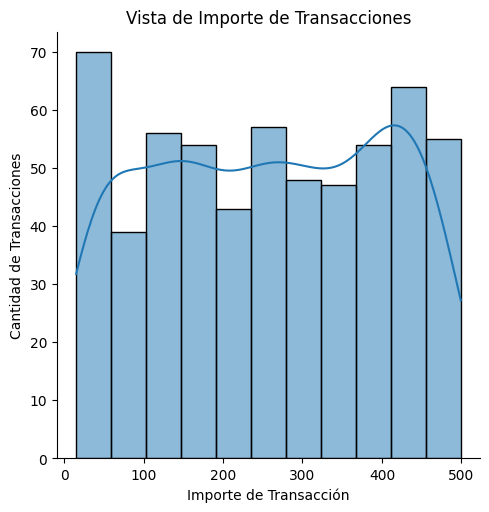

In [7]:
sns.displot( data=df["amount"], kde=True )
plt.xlabel('Importe de Transacción')
plt.ylabel('Cantidad de Transacciones')
plt.title('Vista de Importe de Transacciones')

* Interpretación del Gráfico (Vista de Importe de Transacciones) :  
En este histograma podemos ver información relevante sobre las cantidades de transacciones efectuadas separadas por rangos de importe.  
Se puede apreciar que la mayor parte de ellas (70) son de las de menor importe y el resto parecen seguir la misma media aunque se puede apreciar un pequeño pico en torno a las transacciones por valor al rededor de 450.

## Ejercicio 2: Dos variables numéricas.  
* Para este ejercicio mostraré la relación entre los usuarios y las transacciones realizadas , tomando como referencia los importes.  
    * Utilizaré un gráfico de dispersión e intentaré identificar patrones en el.   
* GRÁFICO DE DISPERSIÓN (scatter) :  
    * Para este gráfico tomare las 2 columnas del DataFrame anterior y pondré en el eje X los id de usuario y en el eje Y los importes de las transacciones.  
    * Pongo los label a los ejes X , Y.  
    * Se pone título al gráfico.  
    * Se muestra el gráfico.  

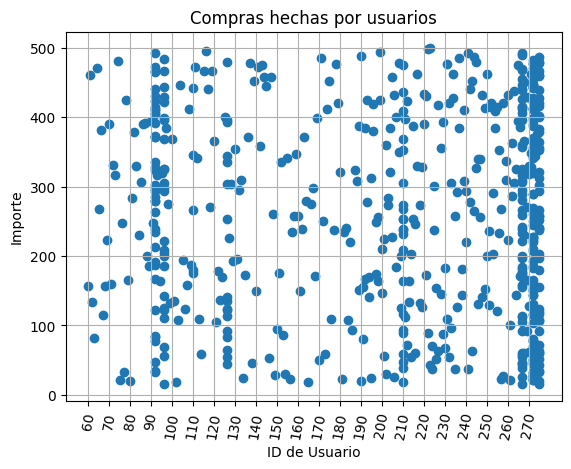

In [8]:
plt.scatter(df['user_id'],df['amount'])
plt.xlabel('ID de Usuario')
plt.ylabel('Importe')
plt.title('Compras hechas por usuarios')
plt.grid()
plt.xticks(range(min(df['user_id']), max(df['user_id'])+1, 10),rotation=80)
plt.show()


* Interpretación del Gráfico (Compras hechas por usuarios) :  
Como resultado del gráfico podemos ver la dispersión de las transacciones pero se nota claramente de que los usuarios con ID entre el 90 y 100 y especialmente entre 265 en adelante son los que han efectuado la mayor cantidad de transacciones ya que es donde se concentra la mayor cantidad de puntos. 

## Ejercicio 3: Una variable categórica.  
* En este caso he decido mostrar la distribución de usuarios que tiene cada país.  
    * Hago una conteo de los ID de usuario y los agrupo por país.   
    * Creo el gráfico de pastel que es el que he elegido para este ejercicio.   

user_country
Canada            352
United Kingdom     62
United States     173
Name: user_id, dtype: int64


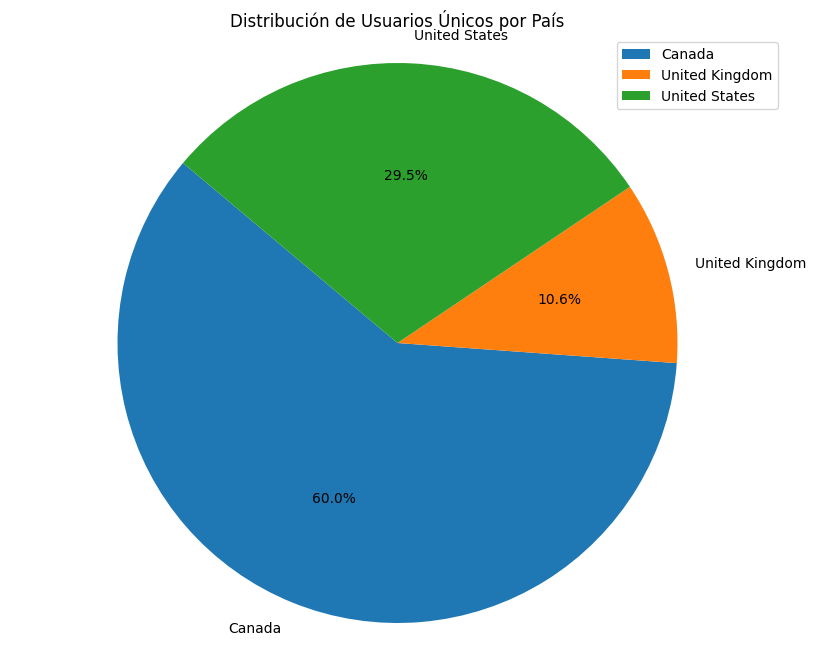

In [9]:
user_counts_by_country = df.groupby('user_country')['user_id'].count()
print(user_counts_by_country)
# Crear gráfico de pastel
plt.figure(figsize=(10, 8))
user_counts_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')  # Eliminar la etiqueta de y que aparece por defecto
plt.title('Distribución de Usuarios Únicos por País')
plt.axis('equal')  # Para asegurar que el gráfico de pastel es un círculo
plt.legend()
plt.show()



* Interpretación del Gráfico (Usuarios por País) :  
Este gráfico nos muestra de una manera clara de que la totalidad de los usuarios que tiene la empresa estan distribuidos en 3 países:  
    * Canadá
    * Estados Unidos
    * Reino Unido  
El gráfico de pastel nos muetra el porcentaje de cada país en la repartición general donde claramente Estados Unidos es donde tenemos el grueso de usuarios de la empresa.  
Dependiendo de los objetivos de la empresa se puede adoptar una estratégia para incrementar la participación de los que están por debajo en porcentaje de participación o si se considera oportuno definir un plan de expanción donde se pueda captar usuarios de otro país aprovechando la referencia sólida conseguida en estos tres primeros.

# Ejercicio 4: Una variable categórica y una numérica.
* Para este ejercicio tomaré la suma de las ventas y las agruparé por países , de esta manera se representarán las dos variables solicitadas en el ejercicio.
    * Hago la suma de los importes de las transacciones y las agrupo por el país de las compañías.  
    * Muestro la información que he seleccionado.
    
* GRÁFICO DE BARRAS :  
    * Creo el gráfico cargando los datos de la consulta del df que había guardado en una variable.    
    * Pongo los letreros de los ejes para que la imagen sea facil de interpretar.  
    * Coloco un título al gráfico.  
    * Como los nombres de los países se solapaban y no se veía bien , he utilizado ticks en el eje X para indicar que los valores se roten en 80 para que se pueda leer claramente el nombre de cada país.  
    * Finalmente muestro el gráfico.

company_country
Australia          2784.63
Belgium            2965.92
Canada            16448.52
China               682.67
France             1075.19
Germany           28815.98
Ireland           17193.12
Italy              3427.03
Netherlands        4554.32
New Zealand        2445.05
Norway            17286.71
Spain               106.80
Sweden            20588.59
United Kingdom    27073.17
United States      5256.05
Name: amount, dtype: float64


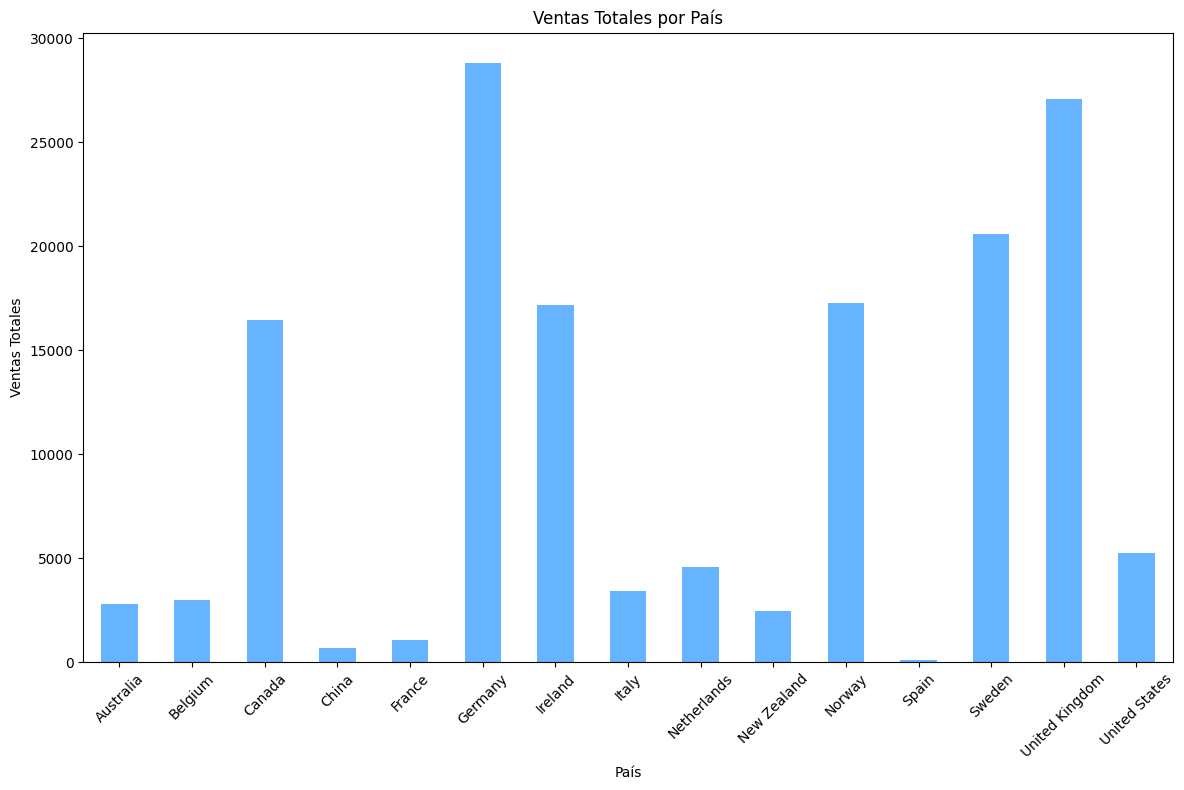

In [10]:
ventas_por_pais = df.groupby('company_country')['amount'].sum()
print(ventas_por_pais)

# Creación del gráfico
plt.figure(figsize=(12, 8))
ventas_por_pais.plot(kind='bar', color='#66b3ff')
plt.xlabel('País')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por País')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el layout para que no se solapen las etiquetas
plt.show()

* Interpretación del Gráfico (Ventas por País) :  
En este gráfico se muestra la suma total de las ventas efectuadas por cada país donde podemos apreciar de que Alemania es el que va a la cabeza muy cerca de alcanzar los 30000 ,seguido de Reino Unido que sobrepasa los 25000.  
De la misma manera se ve que España , China y Francia son los 3 que peor resultado están consiguiendo y están muy por debajo de los otros por lo que podemos recomnedar que es necesario tomar acciones para incrementar las ventas en dichos países y valorar los recursos destinados para ellos.

# Ejercicio 5: Dos variables categóricas.  
* Mostraré las transacciones rechazadas agrupadas por países.  
    * Hago una suma de los declined y los agrupo por los países de las compañías.  
    * Hago un visualización para comprobar.  
* Creo el gráfico :
    * Utilizo la variable donde almacené el resultado de la búsqueda para poder cargar los datos en el gráfico.  
    * Con axhline agrego una línea en el eje y que he puesto en 5 para hacer un corte visual de cuales son los países que están por encima de ella.
    

company_country
Australia          6
Belgium            5
Canada             4
China              1
France             3
Germany            7
Ireland            6
Italy              8
Netherlands        8
New Zealand        5
Norway             7
Spain              1
Sweden            11
United Kingdom     7
United States      8
Name: declined, dtype: int64


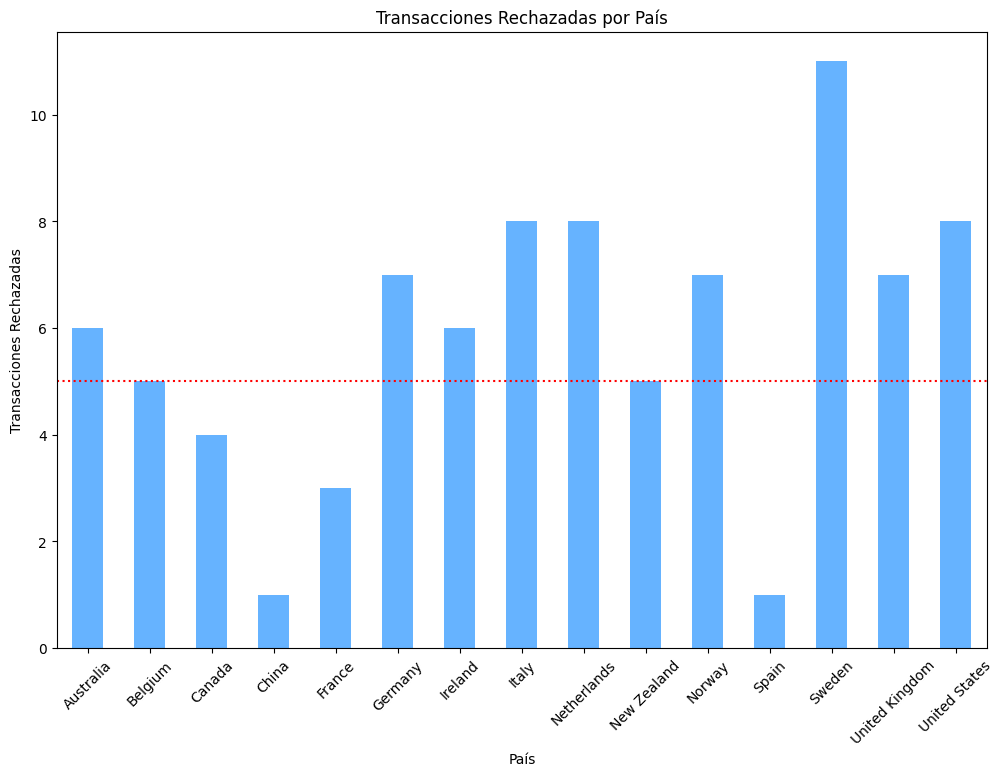

In [14]:
rechazadas_por_pais = df.groupby('company_country')['declined'].sum()
print(rechazadas_por_pais)

# Creo el ggráfico
plt.figure(figsize=(12, 8))
rechazadas_por_pais.plot(kind='bar', color='#66b3ff')
plt.xlabel('País')
plt.ylabel('Transacciones Rechazadas')
plt.title('Transacciones Rechazadas por País')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.axhline(y=5, color='red', linestyle=':')
plt.show()

* Interpretación del Gráfico (Transacciones Rechazadas por País) :  
En este gráfico se muestran las transacciones que hansidorechazadas por países y se ha agregado una línea de corte en5 transacciones para indicaar cuales son los países que sobrepasan este límite.  

# Ejercicio 6: Tres variables  
* En este caso voy a analizar la cantidad de transacciones, las cantidades de transacciones que han sido rechazadas y para poder entenderlo mejor lo agruparé todo por país.  
    * Hago una query que me muestre un conteo de las transacciones y la suma de los declined y los paises donde tendré que hacer una JOIN ya que estas columnas se encuentran en distintas tablas, y agrupo el resultado por paises.  
    * Para comprobar que la query tiene la información que deseo consulto la información y visualizo el DataFrame donde la he cargado. 

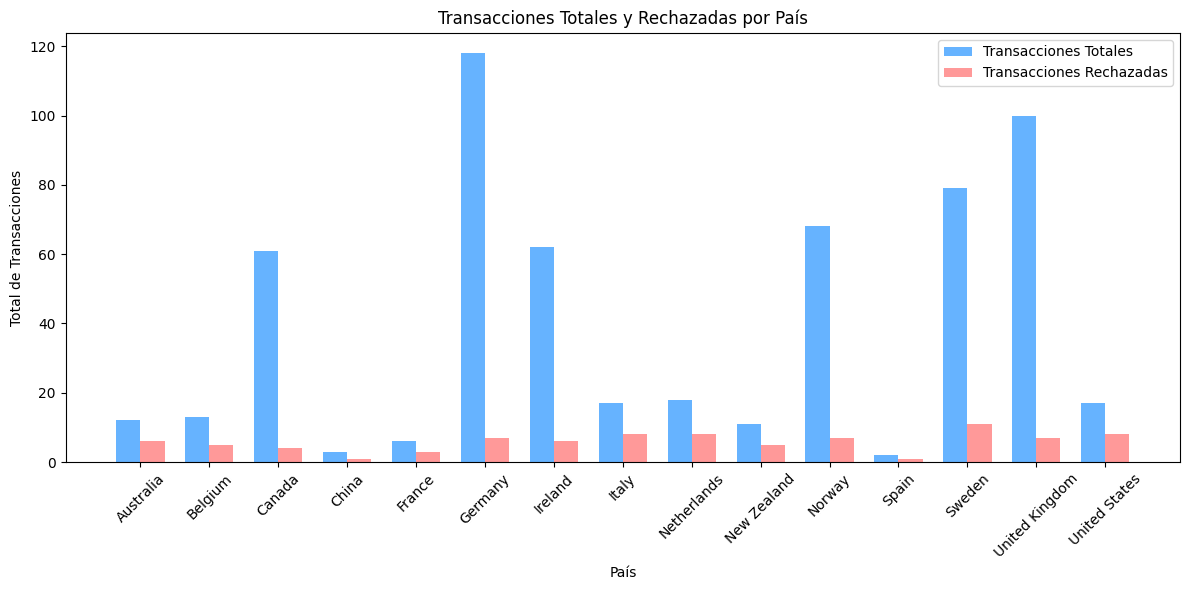

In [57]:


# Calcular el total de transacciones por país
ventas_por_pais = df.groupby('company_country')['id'].count()

# Calcular el total de transacciones rechazadas por país
rechazadas_por_pais = df.groupby('company_country')['declined'].sum()

# Obtener las etiquetas de los países
labels = ventas_por_pais.index

# Obtener los datos de transacciones totales y rechazadas como listas
transacciones_totales = ventas_por_pais.values
transacciones_rechazadas = rechazadas_por_pais.values

# Ancho de las barras
bar_width = 0.35

# Coordenadas x para las barras
x = np.arange(len(labels))

# Crear el gráfico de barras superpuestas
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, transacciones_totales, width=bar_width, label='Transacciones Totales', color='#66b3ff')
plt.bar(x + bar_width/2, transacciones_rechazadas, width=bar_width, label='Transacciones Rechazadas', color='#ff9999')

# Añadir etiquetas y título
plt.xlabel('País')
plt.ylabel('Total de Transacciones')
plt.title('Transacciones Totales y Rechazadas por País')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


* Interpretación del Gráfico (Transacciones Totales y Declinadas por País) : 
En este gráfico lo que podemos ver es la cantidad de transacciones que tiene cada país y en contraste la cantidad de las que han sido rechazadas.  
También se aprecia una línea de corte que es el tope que tiene la empresa dando como un máximo 10 transacciones rechazadas por país y si nos enfocamos en esta coparativa vemos que Suecia es el único que sobrepasa esta línea pero es llamativo que paises como España, Francia, China, Bélgica, Italia, Nueva Zelanda, Estados Unidos y Australia tengan casi la mitad de sus respectivas transacciones rechazadas.  
Por contra hay  otros que tienen una significativa diferencia positica respecto a cantidad de ventas finalizadas vs rechazadas donde Alemanía va claramenre a la cabeza.

# Ejercicio 7: Graficar un Pairplot

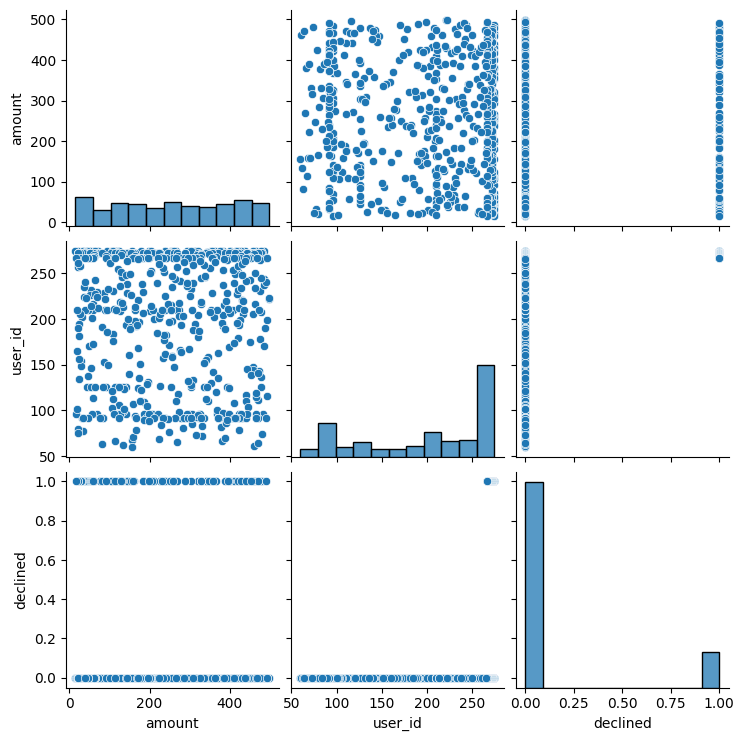

In [71]:
columnas_seleccionadas = ['amount', 'user_id','declined']

# Selecciona las columnas relevantes del DataFrame
df_seleccionado = df[columnas_seleccionadas]

# Crea el pairplot con las columnas seleccionadas
sns.pairplot(df_seleccionado)

# Muestra el pairplot
plt.show()

# --NIVEL 2--  
# Ejercicio 1: Correlación de todas las variables númericas.    
* Lo primero que hago es seleccionar las variables que voy a utilizar, para ello ejecuto df.info() y así puedo identificar todas las variables númericas, como la variable user_id es las misma que users_id he decidido quedarme solo con una de ellas.  
* Asigno la lista de las variables que he tomado del df a una variable.  

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587 entries, Canada to Canada
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               587 non-null    object 
 1   card_id          587 non-null    object 
 2   business_id      587 non-null    object 
 3   timestamp        587 non-null    object 
 4   amount           587 non-null    float64
 5   declined         587 non-null    int64  
 6   product_ids      587 non-null    object 
 7   user_id          587 non-null    int64  
 8   lat              587 non-null    float64
 9   longitude        587 non-null    float64
 10  company_id       587 non-null    object 
 11  company_name     587 non-null    object 
 12  phone            587 non-null    object 
 13  email            587 non-null    object 
 14  company_country  587 non-null    object 
 15  website          587 non-null    object 
 16  users_id         587 non-null    int64  
 17  name         

In [62]:
selected_columns = ['amount', 'declined', 'user_id','lat','longitude']
df_selected = df[selected_columns]

* Uso el método corr() de pandas para calcular la matriz de correlación de las variables seleccionadas,
* Hago un print para ver la información obtenida de la matríz. 

In [63]:
correlation_matrix = df_selected.corr()
print(correlation_matrix)

             amount  declined   user_id       lat  longitude
amount     1.000000 -0.037882 -0.035354  0.078116   0.043439
declined  -0.037882  1.000000  0.414293  0.010402  -0.002523
user_id   -0.035354  0.414293  1.000000 -0.004486   0.017145
lat        0.078116  0.010402 -0.004486  1.000000  -0.006894
longitude  0.043439 -0.002523  0.017145 -0.006894   1.000000


* Creo el gráfico de Matríz de correlación:

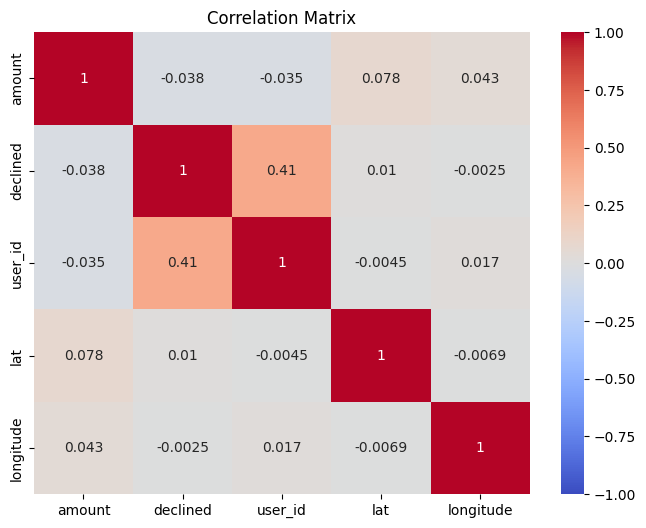

In [64]:
# Crear una figura y un eje
plt.figure(figsize=(8, 6))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Título del gráfico
plt.title('Correlation Matrix')

# Mostrar el gráfico
plt.show()

# Ejercicio 2: Implementa un Joinplot.

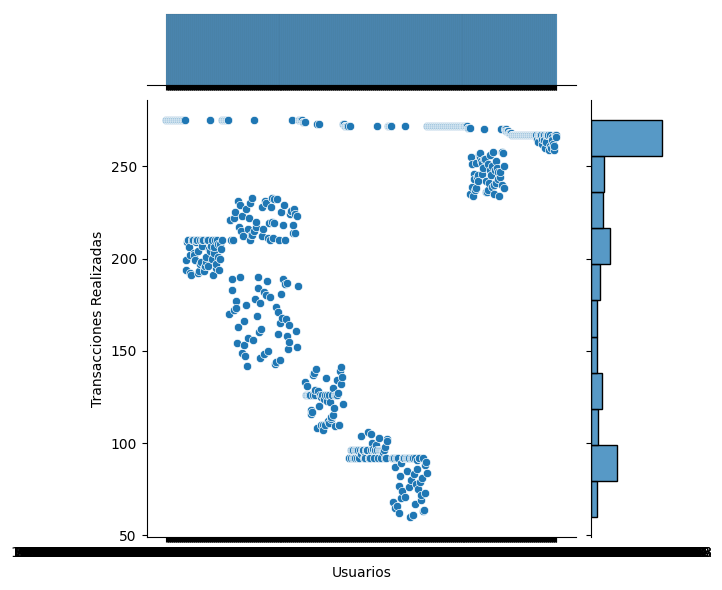

In [87]:

# Crea el jointplot con las columnas seleccionadas
sns.jointplot(x='id', y='users_id', data=df)
plt.xlabel('Usuarios')
plt.ylabel('Transacciones Realizadas')
# Muestra el jointplot
plt.show()

# --Nivel 3--
# Ejercicio 1: Implementa un violinplot combinado con otro tipo de gráfico.

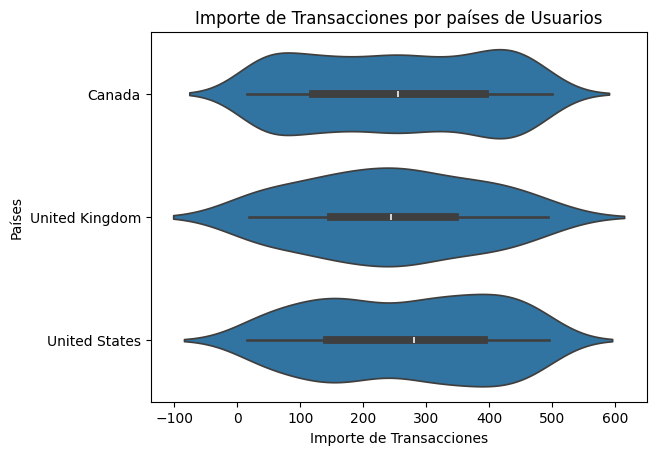

In [78]:
sns.violinplot(x='amount', y='user_country', data=df)
plt.xlabel('Importe de Transacciones')
plt.ylabel('Países')
plt.title('Importe de Transacciones por países de Usuarios')
plt.show()

# Ejercicio 2: Genera un FacetGrid para visualizar múltiples aspectos de los datos simultáneamente.

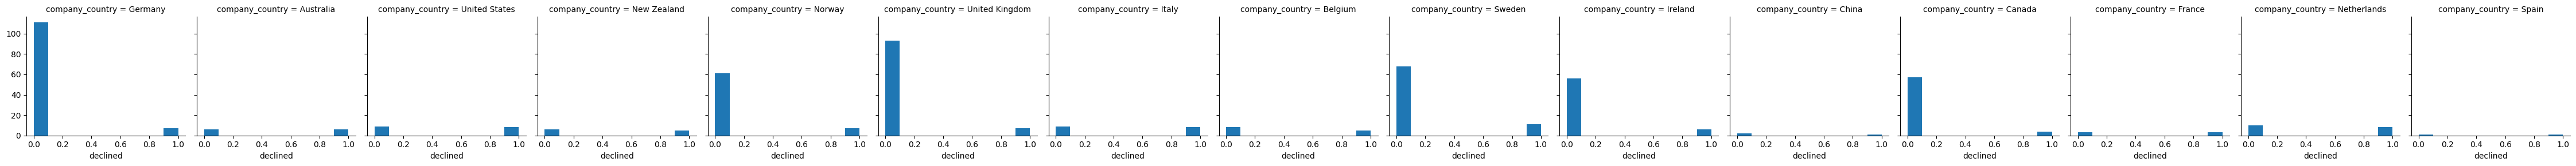

In [89]:
g = sns.FacetGrid(df, col='company_country')
g.map(plt.hist, 'declined')
plt.show()